##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:*** 16

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Rohan Chavan, Mihir Kulkarni, Vaibhav Khanna, Darsh Shani

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS2739H, 2021A7PS2689H, 2021A7PS2819H, 2021A7PS2171H


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

## Loading Input Dataset
We load the given dataset using Pandas as a DataFrame Object

In [89]:
import pandas as pd
import numpy as np

dataset = pd.read_excel("diabetes2.xlsx")

## Dataset Generation
We pick 500 random data points to be used in our project, using fastML synthesizer of sdv module. This dataset is saved to the local storage as dataset.csv

In [90]:
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset

# Setting up the metadata for the dataset, to be used in the synthesizer
metadata = SingleTableMetadata()
# AutoDetecting features of the dataframe
metadata.detect_from_dataframe(dataset)
# Setting the type (for sdv) of Outcome to categorical
metadata.update_column(
    column_name='Outcome',
    sdtype='categorical')

# Creating the synthesizer
synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

# Shuffling the data and generating 500 sample datapoints from it
dataset = dataset.sample(frac = 1)
synthesizer.fit(
    data=dataset
)
sample_data = synthesizer.sample(
    num_rows=500
)
# Saving generated dataset in a local csv file
sample_data.to_csv('dataset.csv')
sample_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,168,79,13,35,35.531192,0.696088,39,1
1,2,92,99,26,26,37.634439,0.078000,35,0
2,4,128,92,44,191,20.404214,0.341428,27,0
3,3,104,40,29,11,21.736459,0.728336,33,0
4,5,106,32,20,104,33.888455,0.403686,21,0
...,...,...,...,...,...,...,...,...,...
495,0,135,56,32,336,39.525318,0.619904,21,0
496,4,127,68,26,45,31.076747,0.677817,49,1
497,6,120,88,61,169,38.943289,0.078000,38,0
498,4,155,78,45,178,43.426387,0.799615,50,0


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

## Loading Generated Dataset
We load the dataset we saved to the local storage previously

In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore',category=FutureWarning)
dataset = pd.read_csv('dataset.csv', index_col=0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,168,79,13,35,35.531192,0.696088,39,1
1,2,92,99,26,26,37.634439,0.078000,35,0
2,4,128,92,44,191,20.404214,0.341428,27,0
3,3,104,40,29,11,21.736459,0.728336,33,0
4,5,106,32,20,104,33.888455,0.403686,21,0
...,...,...,...,...,...,...,...,...,...
495,0,135,56,32,336,39.525318,0.619904,21,0
496,4,127,68,26,45,31.076747,0.677817,49,1
497,6,120,88,61,169,38.943289,0.078000,38,0
498,4,155,78,45,178,43.426387,0.799615,50,0


## Initial Exploratory Analysis
We perform Exploratory Analysis on the dataset to check for illeagal values
using _info_ function of pandas and seaborn histogram plots

### Info Function

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


**Inference:** We see 768 data points with 8 features and an ouput field "Outcome". The dataset does not contain any explicit Null or NaN values.

### Histogram Plot

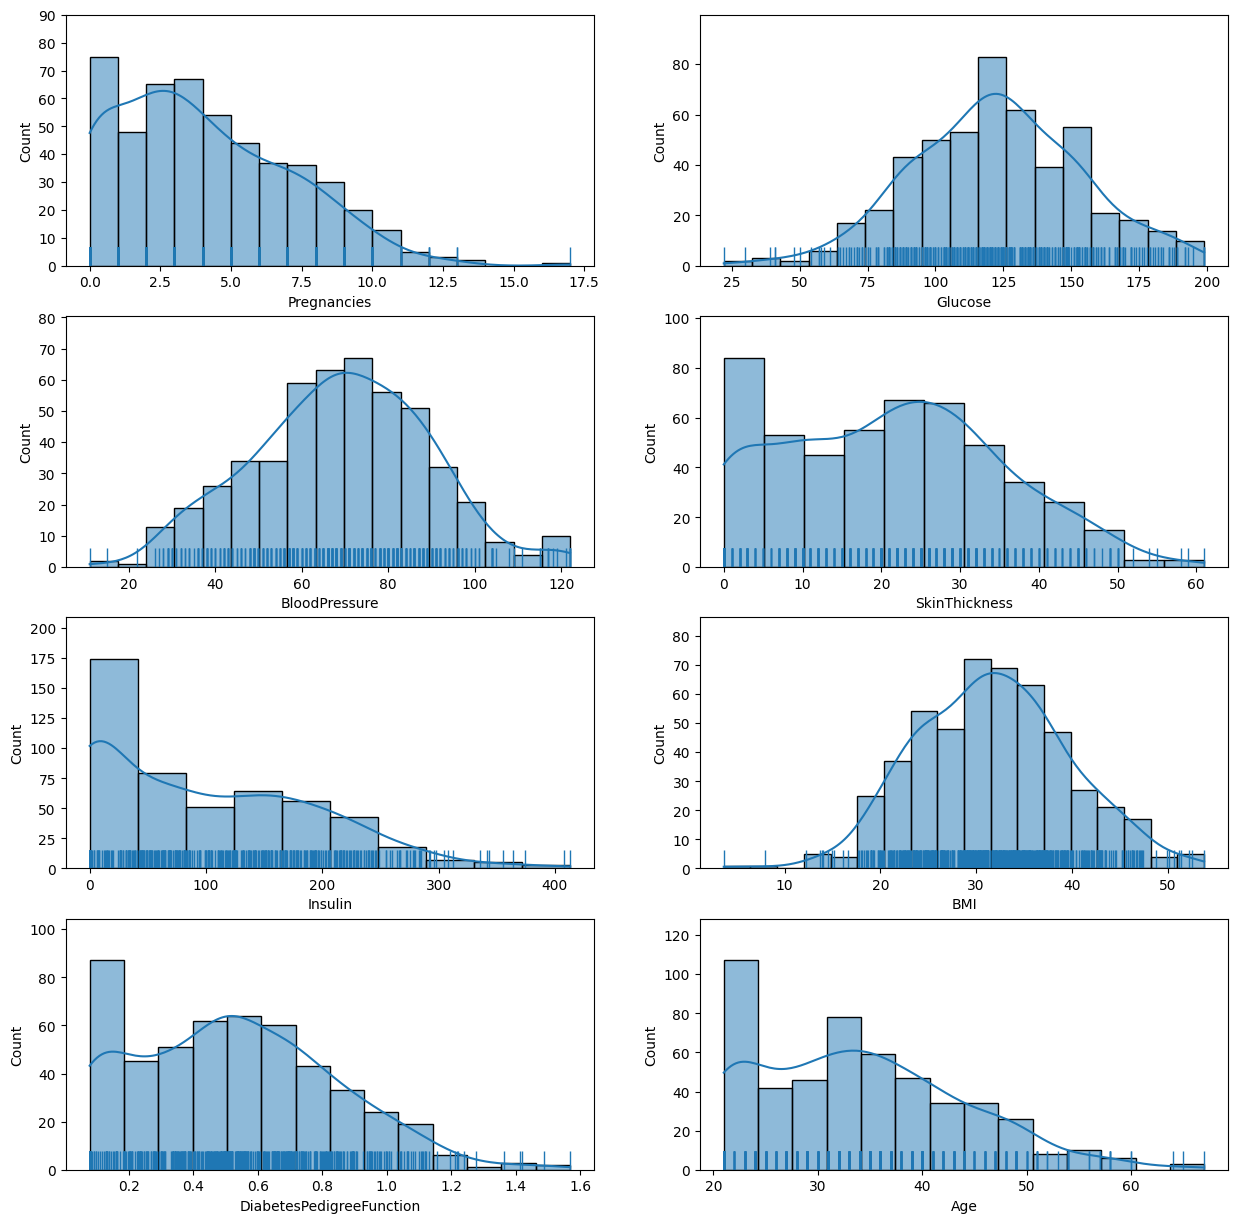

In [93]:
def draw_histplot(height = 0.075):
  # plotting the 8 input features together on the
  fig, axs = plt.subplots(4, 2, figsize=(15,15))
  # convert axes represented in 4x2 into 8x1 (2D array to 1D array)
  axs = axs.flatten()
  i = 0
  for col in dataset.columns[:8]:
    sns.histplot(dataset[col], ax = axs[i], kde = True)
    sns.rugplot(dataset[col], ax = axs[i], height=height)
    i+=1
  plt.show()

draw_histplot()

**Inference:** We see that the fields _Glucose, BloodPressure, SkinThickness, Insulin, BMI_ contain zeroes which is invalid; thus before proceding further we need to either drop the rows containing invalid values, or fill them with some other value.

Since there are large number of rows with 0 in fields _SkinThickness, Insulin_ and _BloodPressure_, instead of dropping them, we will fill all of them with their respective means.

__Note__: It is possible for the fasting Insulin levels of a Type 1 diabetic person to fall to 0; since this is a rare circumstance, we will treat this value as incorrect.

## Filling Null Values

We fill in the missing values in the dataset with mean of the remaining data

In [94]:
# replacing 0s with NaN for easier calculations
# filling these NaN values with mean
for col in ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'):
  dataset[col].replace(0, np.NaN, inplace=True)
  mean = dataset[col].mean(skipna=True)
  dataset[col].fillna(value=mean, inplace=True)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,168,79,13.0,35.0,35.531192,0.696088,39,1
1,2,92,99,26.0,26.0,37.634439,0.078000,35,0
2,4,128,92,44.0,191.0,20.404214,0.341428,27,0
3,3,104,40,29.0,11.0,21.736459,0.728336,33,0
4,5,106,32,20.0,104.0,33.888455,0.403686,21,0
...,...,...,...,...,...,...,...,...,...
495,0,135,56,32.0,336.0,39.525318,0.619904,21,0
496,4,127,68,26.0,45.0,31.076747,0.677817,49,1
497,6,120,88,61.0,169.0,38.943289,0.078000,38,0
498,4,155,78,45.0,178.0,43.426387,0.799615,50,0


## Outlier Detection (Box Plots)

We check for outliers in the dataset using boxplots on each field

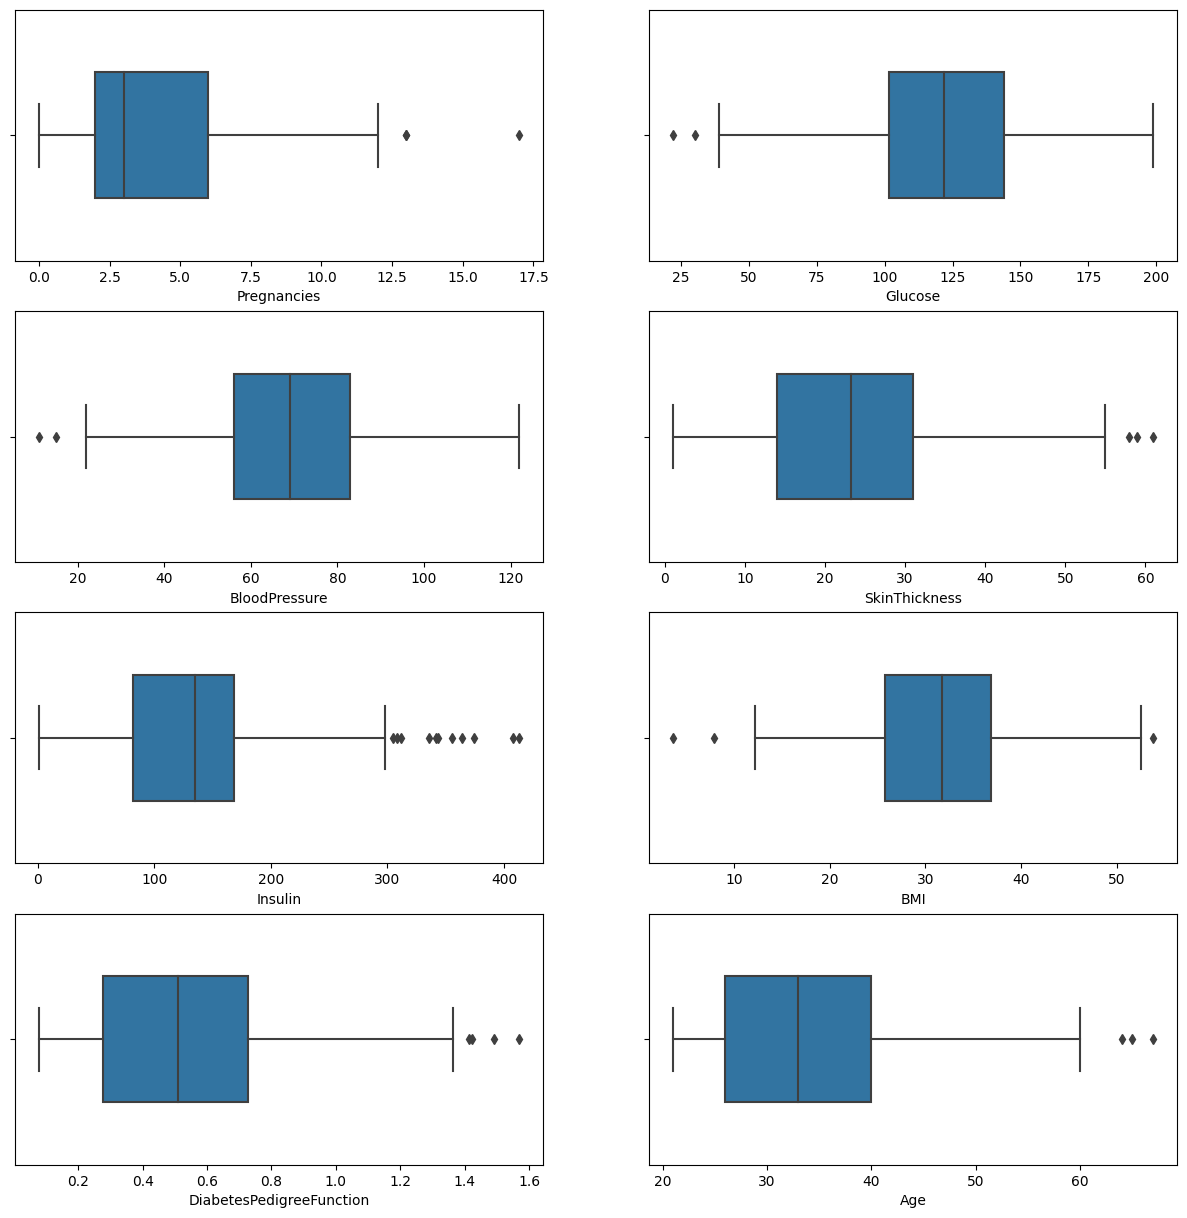

In [95]:
def draw_boxplot(width=0.5):
  # plotting the 8 input features together on the same figure
  fig, axs = plt.subplots(4, 2, figsize=(15,15))
  # convert axes represented in 4x2 into 8x1 (2D array to 1D array)
  axs = axs.flatten()
  i = 0
  for col in dataset.columns[:8]:
    sns.boxplot(x=dataset[col], ax=axs[i], width=width)
    i+=1
  plt.show()

draw_boxplot()

**Inference:** We observe a few outliers in the data. Among these outliers, we eliminate the most extreme ones.


## Deleting outliers

We delete the extreme outlying points, identified by having z-score more than 3.2 (distance from mean more than 3 times the standard deviation).

In [96]:
for col in ('Insulin', 'BMI', 'BloodPressure', 'Pregnancies', 'Age'):
  mean = dataset[col].mean()
  std = dataset[col].std()
  upper_bound = mean + 3.2*std
  lower_bound = mean - 3.2*std
  dataset = dataset[(dataset[col] <= upper_bound) & (dataset[col] >= lower_bound)]

## Inter Feature Relations

We plot the correlation heatmap and pairplot to visualize the relation between the features.

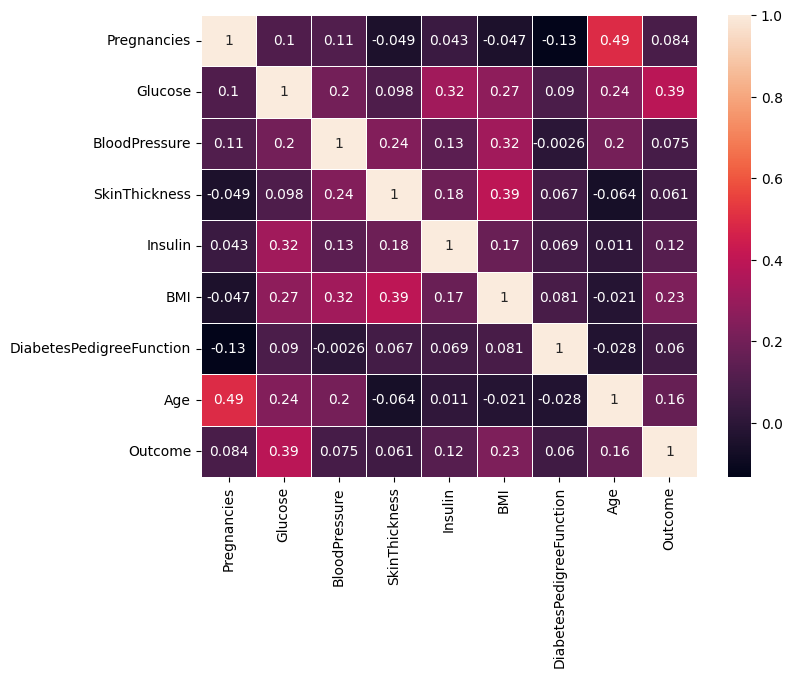

In [97]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dataset.corr(), linewidths=0.5, ax=ax, annot=True)
plt.show()

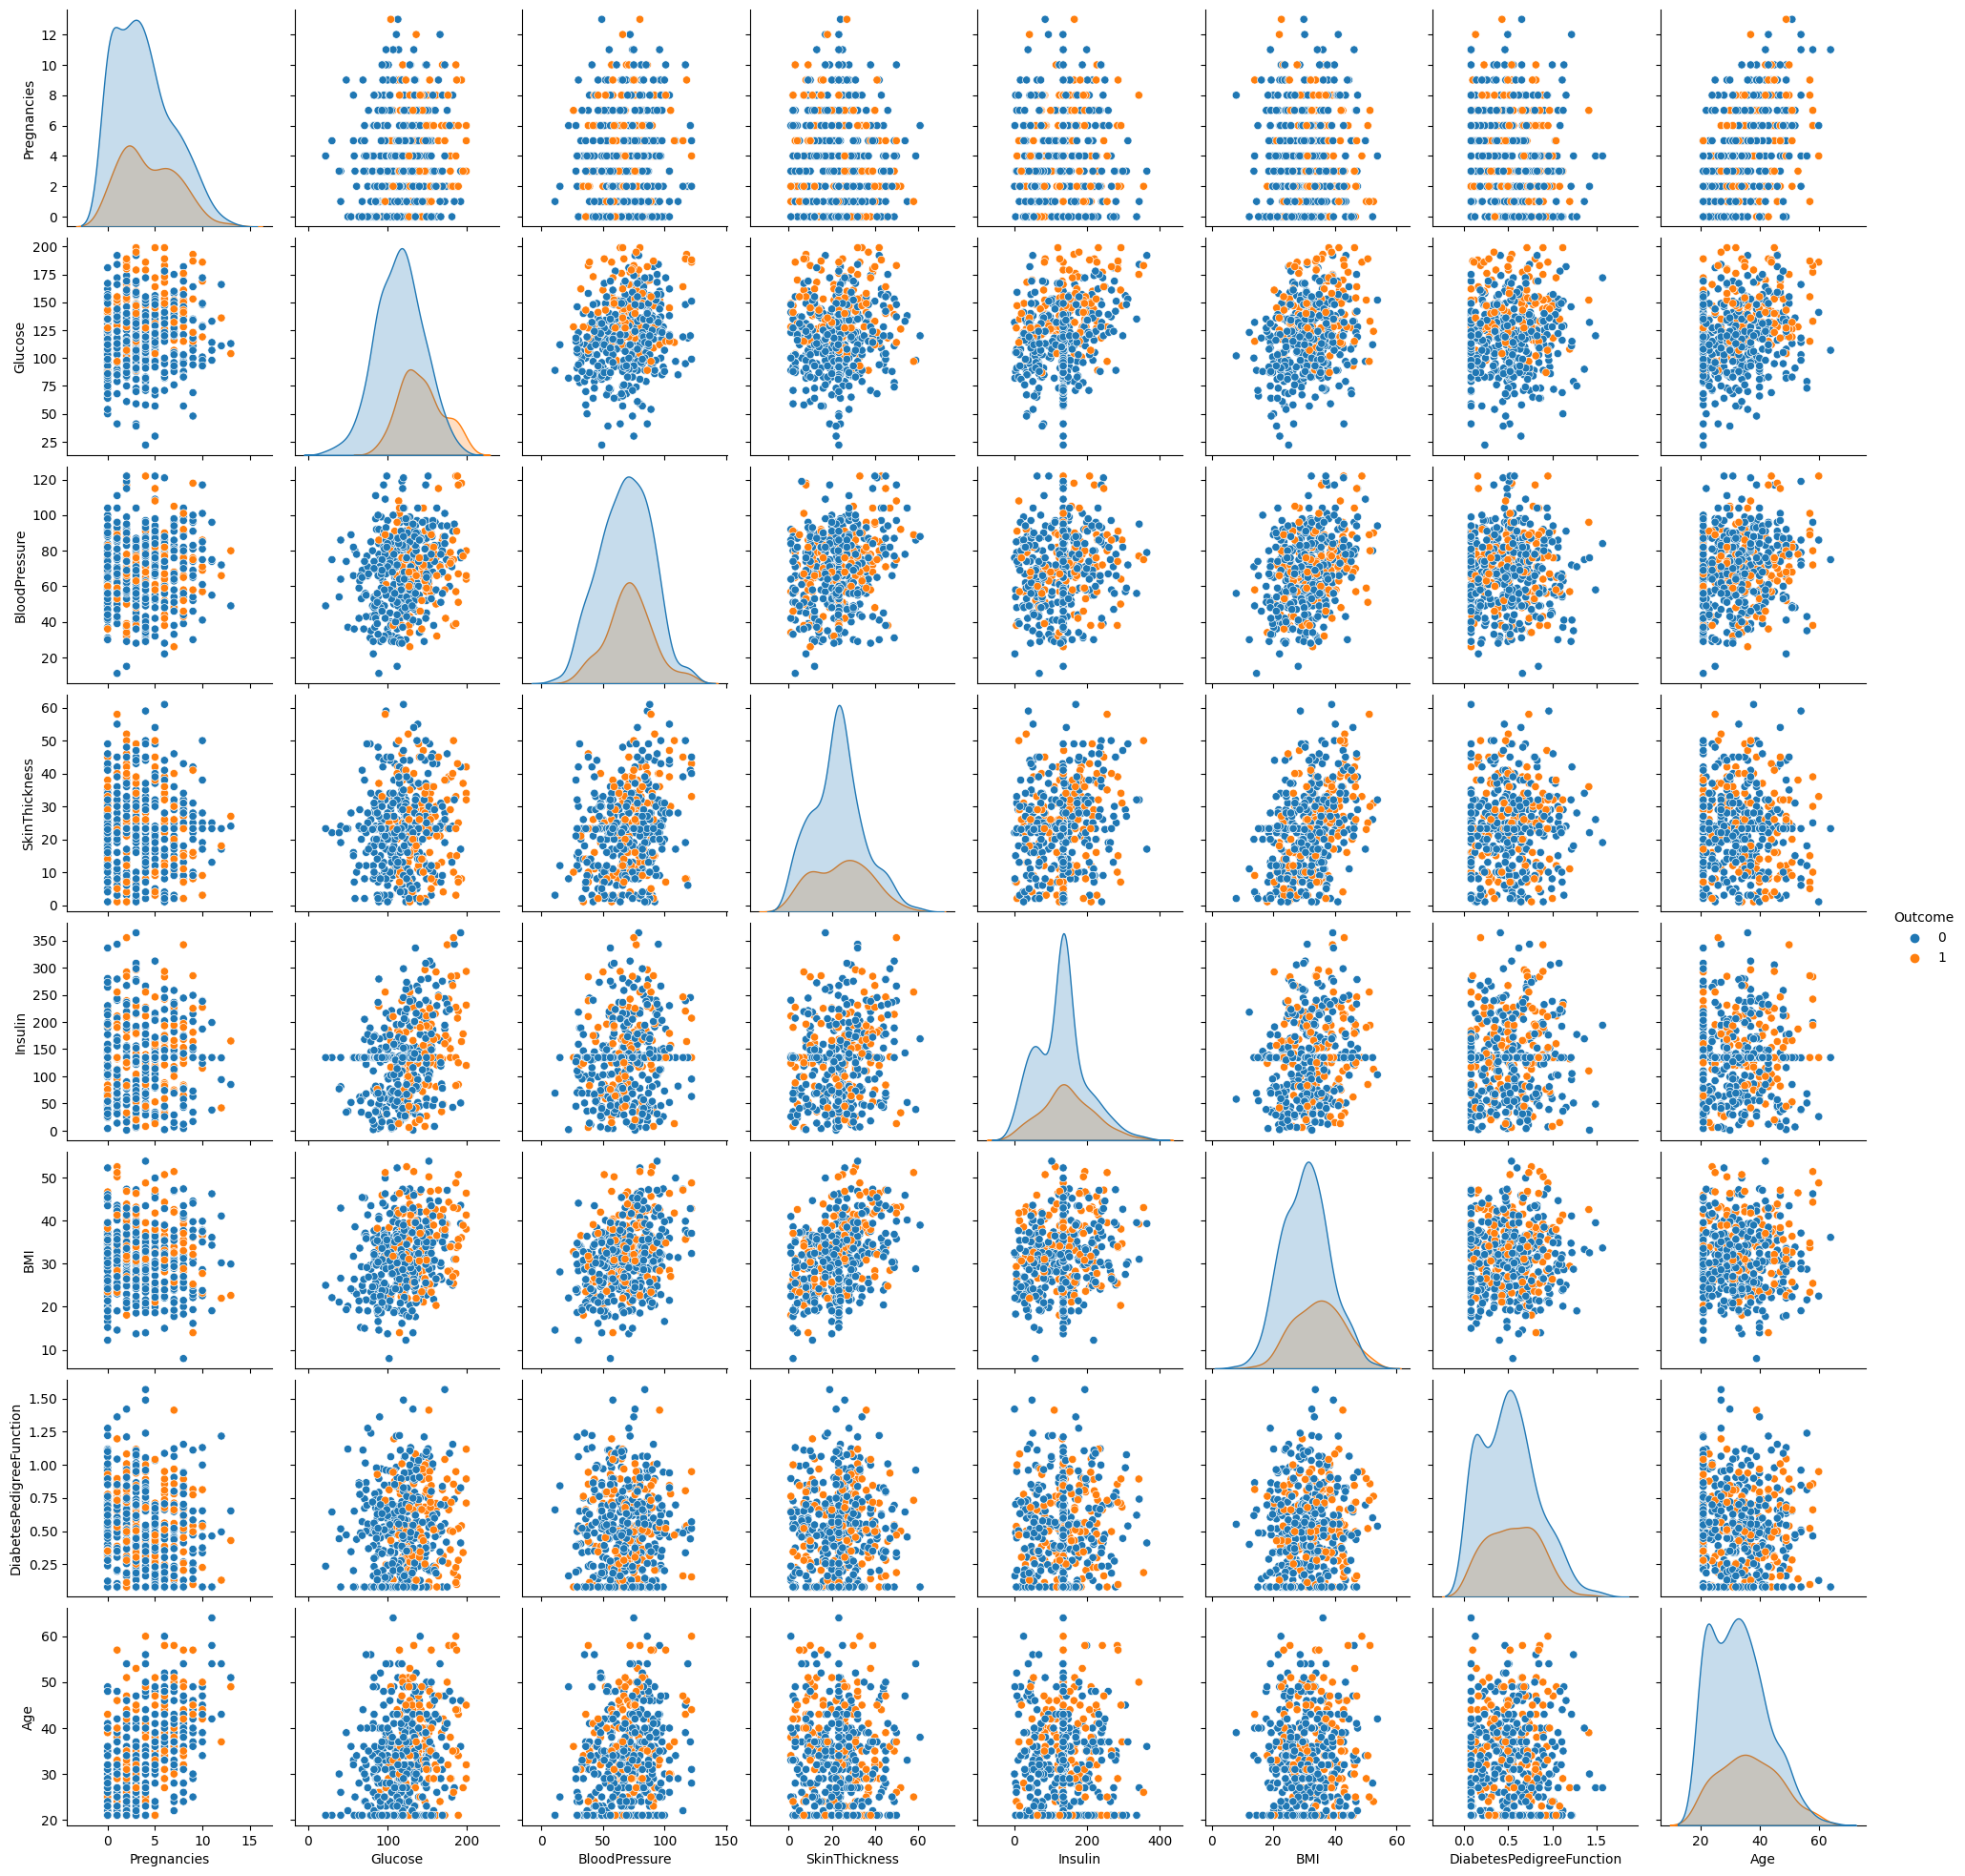

In [98]:
sns.pairplot(dataset, hue = 'Outcome')
plt.show()

**Inference:** Both plots suggest that Pregnancies, Glucose, and BMI are likely to have the most significant impact on the outcome. Additionally, there appears to be interdependence between Insulin and SkinThickness, as well as between Age and Pregnancies.

## Saving Preprocessed Dataset

We save the preprocessed dataset into preprcessed.csv file. We also redraw all the graphs after preprocessing.

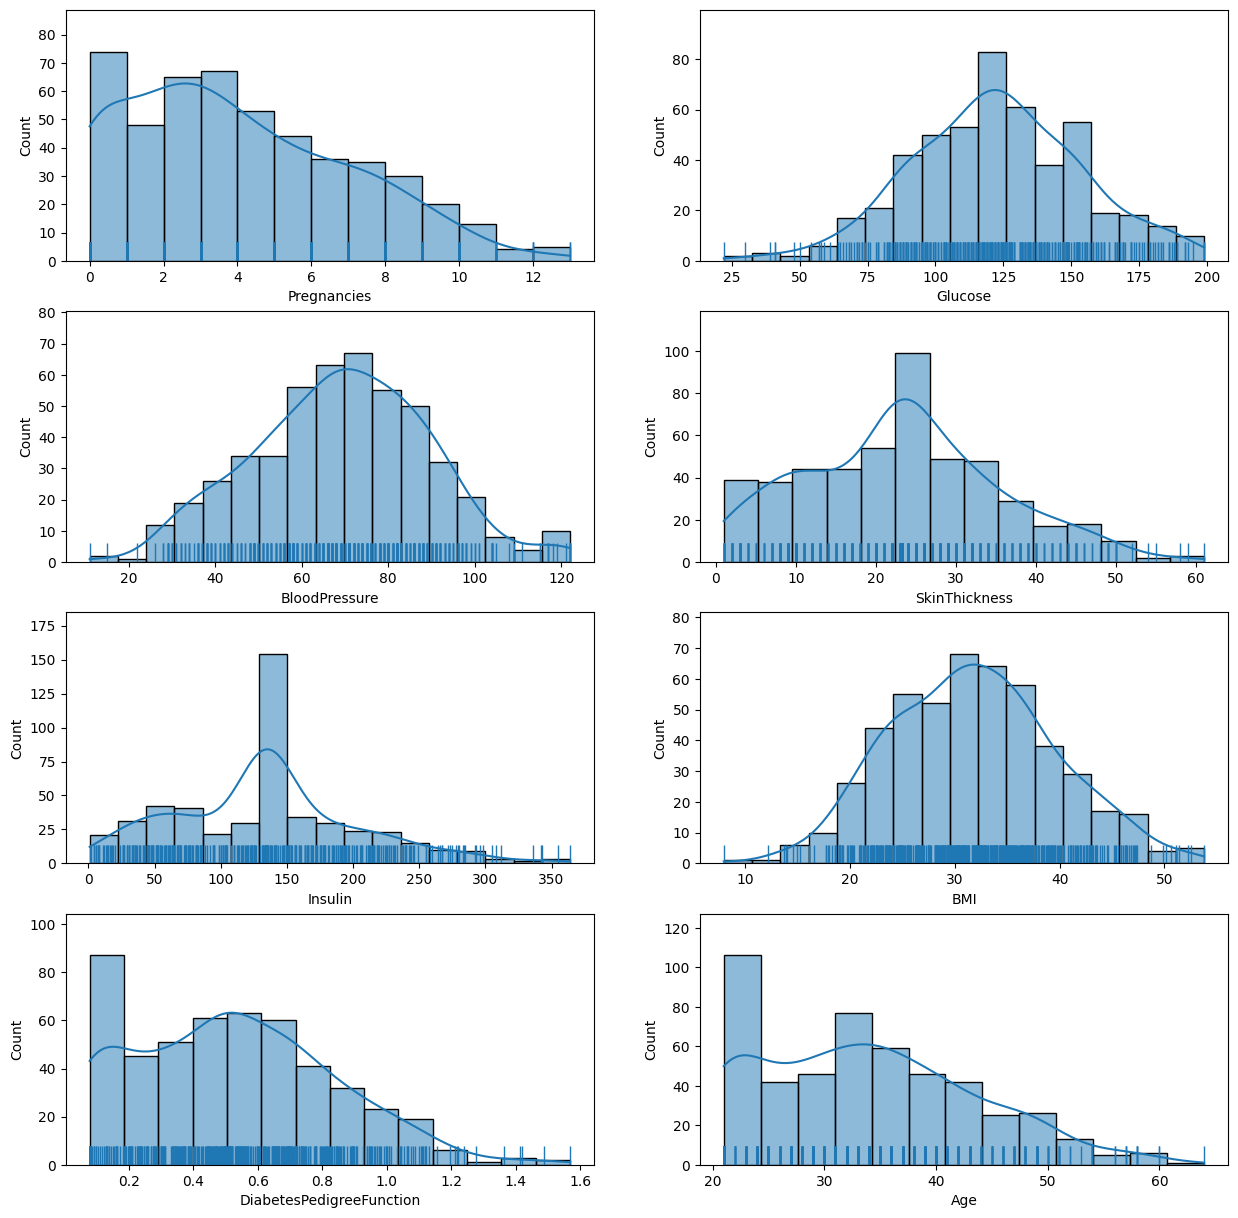

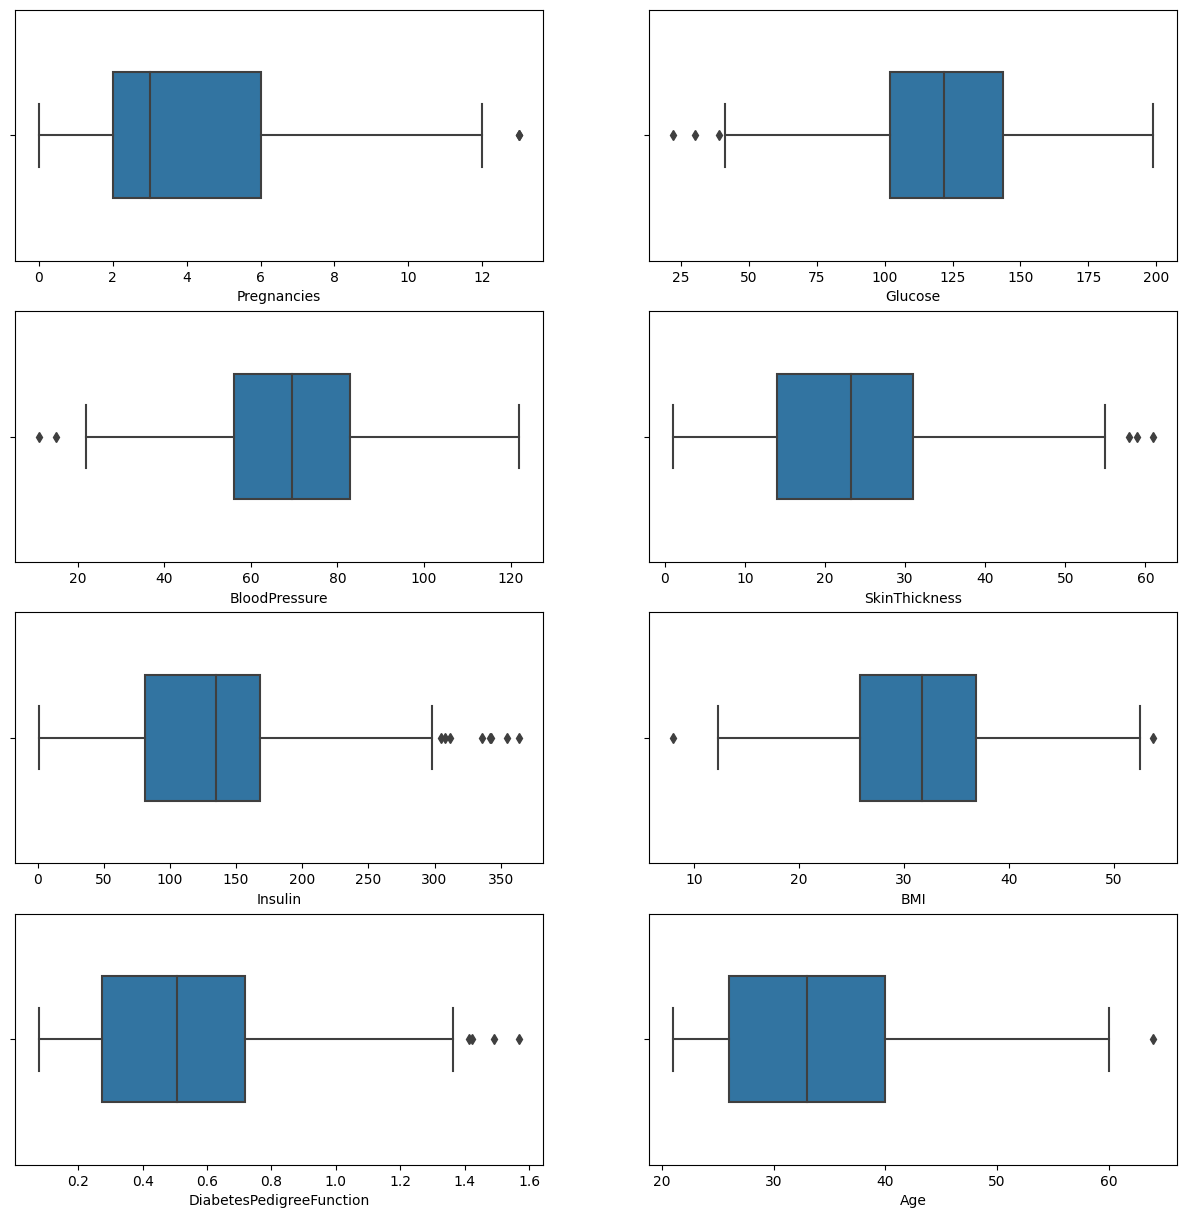

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               494 non-null    int64  
 1   Glucose                   494 non-null    int64  
 2   BloodPressure             494 non-null    int64  
 3   SkinThickness             494 non-null    float64
 4   Insulin                   494 non-null    float64
 5   BMI                       494 non-null    float64
 6   DiabetesPedigreeFunction  494 non-null    float64
 7   Age                       494 non-null    int64  
 8   Outcome                   494 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 38.6 KB


In [99]:
dataset.to_csv("preprocessed.csv")
draw_histplot()
draw_boxplot()
dataset.info()

**Final Comments:** After Preprocessing we are left with 494 datapoints which do not contain any erroneous values. We can now apply Machine Learning Algorithms to the same.

## Test-Train Split

### Loading the preprocessed dataset
We load our preprocessed dataset, divide it into testing and training dataset

In [100]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('preprocessed.csv', index_col=0)

# random state provides reproducible results through seed
def test_train_split(dataset: pd.DataFrame, test_size = 0.25, random_state = 0):
  np.random.seed(random_state)
  # shuffle indices
  indices = np.random.permutation(len(dataset)).tolist()
  dataset_test_size = int(dataset.shape[0]*test_size)

  # separating test-train indices
  test_indices = indices[:dataset_test_size]
  train_indices = indices[dataset_test_size:]
  return (dataset.iloc[test_indices], dataset.iloc[train_indices])

test, train = test_train_split(dataset)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
146,6,98,61,22.000000,31.0,31.647648,0.246104,27,1
323,3,120,59,35.000000,179.0,31.814978,0.078000,29,0
60,1,124,90,31.000000,113.0,52.510288,0.762756,24,1
183,4,113,31,14.000000,75.0,34.301191,0.649444,24,0
392,3,148,42,1.000000,240.0,33.913745,0.234829,33,0
...,...,...,...,...,...,...,...,...,...
328,5,139,60,37.000000,141.0,32.333887,1.033084,36,0
196,4,125,62,8.000000,123.0,26.371547,0.308802,25,1
121,12,166,72,23.256579,134.0,30.180741,0.493831,54,0
47,1,79,85,26.000000,164.0,23.455271,0.078000,21,0


### Feature Scaling (Standardization)

We Standardize the features for a more efficient model scaling. We pick up the mean and standard deviation from the training set, but apply it to the whole dataset.

In [101]:
# standardizes each column and adds dummy ones to the front; assumes last column is outcome
def standardize(test: pd.DataFrame, train: pd.DataFrame):
  n = len(train.columns)
  for col in train.columns[:n-1]:
    mean = train[col].mean()
    std = train[col].std()
    train.loc[:,col] = (train[col]-mean)/std
    test.loc[:,col] = (test[col]-mean)/std
  # adding dummy 1s as the first column of the datasets (used in matrix operations)
  train_ex = np.concatenate((np.ones(shape = (train.shape[0], 1)), train), axis = 1)
  train_ex.astype(np.longdouble)
  test_ex = np.concatenate((np.ones(shape = (test.shape[0], 1)), test), axis = 1)
  test_ex.astype(np.longdouble)
  return (test_ex, train_ex)

test_ex, train_ex = standardize(test, train)
test_ex[0]

array([ 1.        ,  0.68548505, -1.26500026, -1.03002994, -0.01272878,
        0.02376569, -1.18372703, -1.47095306,  1.82871762,  0.        ])

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## Splitting Dataset into test and train set

In [102]:
import random
import pandas as pd
import numpy as np
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
random.seed(0)
test[0]

array([ 1.        ,  0.68548505, -1.26500026, -1.03002994, -0.01272878,
        0.02376569, -1.18372703, -1.47095306,  1.82871762,  0.        ])

## **_Stochastic Gradient Descent_**

In [103]:
# We will use w for the vector representing weights and b for the number representing bias
# we are not using tolerance to break out of loop in SGD, because few points may randomly be on our curve
# remember that the last column of train contains outcome
def sgd_regressor(train: np.ndarray, learning_rate = 0.4, max_iters = 10000, random_state=0):
  np.random.seed(random_state)
  # initializing w with random values
  W = np.zeros(train.shape[1]-1)
  # run till max iterations
  for _ in range(max_iters):
    # select a random next row
    nextrow = train[random.randint(0, len(train)-1)]
    # extract features and target
    x_i = nextrow[:len(nextrow)-1]
    y_i = nextrow[len(nextrow)-1]
    
    # Apply SGD update rule
    y_pred = np.dot(x_i, W.T)
    error = y_pred-y_i
    W -= learning_rate*x_i*error

    # Decrease learning rate for next iteration
    learning_rate /= 1.0005
  return W

W = sgd_regressor(train)
W

array([ 0.33788835, -1.89395989, -1.22233333, -0.56607351, -0.37944273,
        0.79201251,  1.32433584, -0.24948174,  2.47563165])

## **_Batch Gradient Descent_**

In [104]:
def bgd_regressor(train: np.ndarray, learning_rate = 0.5, max_iters = 100, tolerance = 1e-7):
  X = np.array(train[:, :-1])
  Y = np.array(train[:, -1])
  W = np.zeros(train.shape[1]-1)
  n = len(train)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = np.dot(X.T, Y_pred-Y)
    change = (learning_rate/n)*gradient
    W -= change
    if np.linalg.norm(change) < tolerance: break
    learning_rate /= 1.0005
  return W

W = bgd_regressor(train)
W

array([ 0.2884097 ,  0.00768493,  0.14827058, -0.01247985, -0.00240802,
       -0.00511504,  0.07367895,  0.00745464,  0.03474263])

## **_Insights drawn (plots, markdown explanations)_**

### Initial Learning Rate vs MSE graph
We plot the graph of MSE of bgd regressor with different learning_rates, to find an optimal one

**Note:** It is not possible to plot sgd in the same way due to its unpredictible nature. (In our implementation, we pick a random row and use it to find the gradient, due to which we may get multiple repeats of the same row in unlucky iterations; thus bad results).

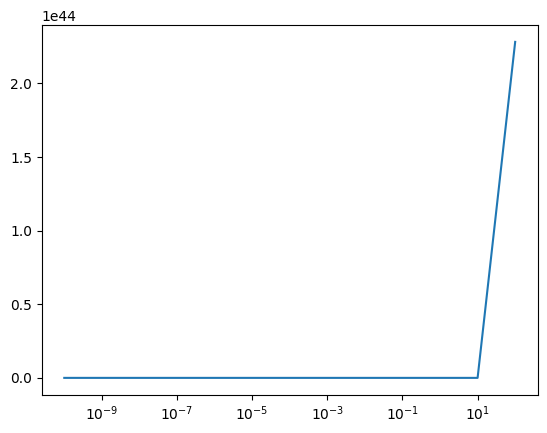

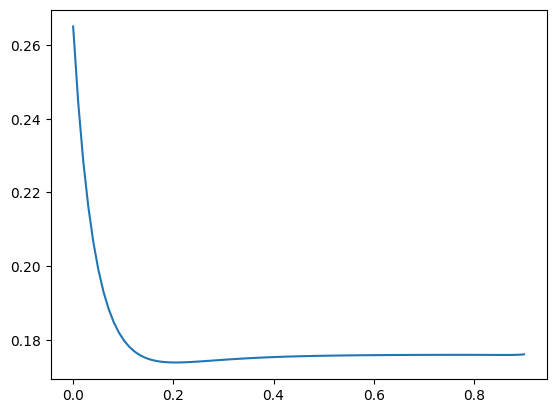

In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def get_batch_avg_mse(learning_rate: float):
  mse_avg = 0.0
  # averaging across 10 different 10 and train splits
  for i in range(5):
    test, train = test_train_split(dataset, random_state=i)
    test, train = standardize(test, train)
    X_test = np.array(test[:, :-1])
    Y_test = np.array(test[:, -1])
    W_batch = bgd_regressor(train, learning_rate=learning_rate, max_iters=10, tolerance=1e-7)
    mse_avg += mean_squared_error(Y_test, np.dot(X_test, W_batch))
  return mse_avg/5

learning_rates = np.array([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0])
plt.xscale('log')
plt.plot(learning_rates, np.vectorize(get_batch_avg_mse)(learning_rates))
plt.show()
learning_rates = np.linspace(0, 0.9, 90)
plt.xscale('linear')
plt.plot(learning_rates, np.vectorize(get_batch_avg_mse)(learning_rates))
plt.show()

**Inference:** We see that a learning rate of nearly 0.2 gives the minimum error.

### Comparison of R2-Score and Mean Square Error.

In [120]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
# initializing metric variables
r2_avg_stoic = 0.0
r2_avg_batch = 0.0
mse_avg_stoic = 0.0
mse_avg_batch = 0.0
W_stoic = np.zeros(train.shape[1] - 1)
# averaging across 10 different 10 and train splits
for i in range(5):
  test, train = test_train_split(dataset, random_state=i)
  test, train = standardize(test, train)
  X_test = np.array(test[:, :-1])
  Y_test = np.array(test[:, -1])
  W_stoic = sgd_regressor(train, random_state=i, learning_rate=0.2)
  r2_stoic_score = r2_score(Y_test, np.dot(X_test, W_stoic))
  mse_avg_stoic += mean_squared_error(Y_test, np.dot(X_test, W_stoic))
  r2_avg_stoic += r2_stoic_score
  W_batch = bgd_regressor(train, learning_rate=0.2)
  r2_avg_batch += r2_score(Y_test, np.dot(X_test, W_batch))
  mse_avg_batch += mean_squared_error(Y_test, np.dot(X_test, W_batch))
r2_avg_batch /= 5
r2_avg_stoic /= 5
mse_avg_batch /= 5
mse_avg_stoic /= 5


print("SGD R2_Score: ", r2_avg_stoic)
print("BGD R2_Score: ", r2_avg_batch)
print("SGD MSE: ", mse_avg_stoic)
print("BGD MSE: ", mse_avg_batch)

SGD R2_Score:  0.10041308464138574
BGD R2_Score:  0.09657337963903878
SGD MSE:  0.1750994413038076
BGD MSE:  0.17599235643055072


**Inference:** We observe that the R2 scores and MSE values for both gradient descent methods are nearly identical. However, the R2 scores for the gradient descent methods are less than ideal, indicating that the target variable may not be well-suited for regression analysis—a conclusion that is also evident from the accompanying plots.

Between both models, Stochastic Gradient Descent (SGD) yields a slightly superior R2 score and MSE value, but for more reliable and consistent results, it is advisable to favor Batch Gradient Descent. Mini-Batch Gradient Descent, however, offers a middle-ground solution, providing improved consistency while still maintaining a reasonable processing speed.

### Accuracy Comparison

In [107]:
accuracy_test_stoic = 0.0
accuracy_train_stoic = 0.0
accuracy_test_batch = 0.0
accuracy_train_batch = 0.0
def round(a: float) -> float:
  return 1.0 if a > 0.5 else 0
for i in range(5):
  test, train = test_train_split(dataset, random_state=i)
  test, train = standardize(test, train)

  X_train = train[:,:-1]
  Y_train = train[:,-1]
  X_test = test[:,:-1]
  Y_test = test[:,-1]

  W_stoic = sgd_regressor(train)
  W_batch = bgd_regressor(train)

  accuracy_test_stoic += np.mean(np.vectorize(round)(np.dot(X_test, W_stoic))==Y_test)
  accuracy_train_stoic += np.mean(np.vectorize(round)(np.dot(X_train, W_stoic))==Y_train)
  accuracy_test_batch += np.mean(np.vectorize(round)(np.dot(X_test, W_batch))==Y_test)
  accuracy_train_batch += np.mean(np.vectorize(round)(np.dot(X_train, W_batch))==Y_train)
print("Stochastic Gradient Descent test data accuracy: ", accuracy_test_stoic/5)
print("Stochastic Gradient Descent train data accuracy: ", accuracy_train_stoic/5)
print("Batch Gradient Descent test data accuracy: ", accuracy_test_batch/5)
print("Batch Gradient Descent train data accuracy: ", accuracy_train_batch/5)

Stochastic Gradient Descent test data accuracy:  0.6975609756097562
Stochastic Gradient Descent train data accuracy:  0.692722371967655
Batch Gradient Descent test data accuracy:  0.7365853658536585
Batch Gradient Descent train data accuracy:  0.7671159029649596


This is a superficial comparison, as regression analysis typically doesn't involve accuracy metrics. However, it serves to provide a clearer perspective on our results when dealing with a discrete target variable outcome.

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## Splitting Dataset into test and train set

In [108]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
344,6,83,48,23.256579,134.581333,22.318210,0.078000,51,0
99,2,118,119,6.000000,134.581333,37.098278,0.507423,54,0
331,5,111,87,49.000000,164.000000,36.805874,0.078000,24,0
249,0,121,82,18.000000,26.000000,26.968717,0.684081,21,0
77,11,107,75,23.256579,134.581333,36.102731,0.078000,64,0
...,...,...,...,...,...,...,...,...,...
371,0,157,94,46.000000,213.000000,34.878839,1.007576,21,0
242,4,128,80,35.000000,255.000000,39.506625,0.078000,21,1
49,2,126,84,13.000000,134.581333,36.341111,0.817264,51,1
250,2,111,71,32.000000,195.000000,31.694340,0.836997,21,0


## Transforming linear data into polynomial and Standardizing

In [109]:
# Assume that the last column is outcome
# degrees is the list of powers to consider
def poly_transform(data: pd.DataFrame, degree = 3) -> None:
  cols = data.columns
  m = len(cols)
  for i in range(2, degree+1):
    for col in cols[:m-1]:
      data.insert(m-1, col+str(i), data[col]**i, False)
      # data[col+str(i)] = data[col]**i

poly_transform(train)
poly_transform(test)
test, train = standardize(test, train)
test[0]

array([ 1.        ,  0.68548505, -1.26500026, -1.03002994, -0.01272878,
        0.02376569, -1.18372703, -1.47095306,  1.82871762,  2.06955633,
       -0.67033249, -0.99619492, -0.30321454, -0.34702913, -0.9196881 ,
       -1.01560664,  0.09674423,  1.98713725, -0.96947554, -1.11102582,
       -0.20327043, -0.24433622, -1.01260427, -1.15733161,  0.36985558,
        0.        ])

## **_Lasso Regression_**

In [110]:
def lasso_regressor(train: np.ndarray, learning_rate = 0.2, l1_penalty = 1e17, max_iters = 100):
  X = np.array(train[:, :-1])
  Y = np.array(train[:, -1])
  W = np.zeros(X.shape[1])
  n = X.shape[0]
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W
  
W = lasso_regressor(train)
W

array([-1.11111111e+16, -1.82861239e+16, -2.71614377e+16, -2.62942405e+16,
       -2.39315982e+16, -2.50931505e+16, -2.66180946e+16, -1.58490012e+16,
       -2.16997412e+16, -2.16523216e+16, -1.57712079e+16, -2.65092201e+16,
       -2.51228512e+16, -2.35246921e+16, -2.58911144e+16, -2.72761398e+16,
       -1.70223466e+16, -2.16732999e+16, -1.56251984e+16, -2.66312109e+16,
       -2.53261045e+16, -2.38883470e+16, -2.61731353e+16, -2.73009390e+16,
       -1.74192824e+16])

## **_Ridge Regression_**

In [111]:
def ridge_regressor(train: np.ndarray, l2_penalty = 10):
  X = np.array(train[:, :-1])
  Y = np.array(train[:, -1])
  return np.linalg.inv((X.T @ X) + (l2_penalty * np.eye(X.shape[1]))) @ (X.T @ Y)
  
W = ridge_regressor(train)
W

array([ 0.2808399 ,  0.0397287 ,  0.06037352,  0.01115787, -0.03786312,
        0.01546629, -0.01805238,  0.06500092, -0.02223305,  0.03883108,
       -0.06892916,  0.0732364 , -0.05311445,  0.00481061, -0.01388907,
        0.05310841, -0.02357521,  0.01913236, -0.0006496 ,  0.02026332,
        0.0129012 ,  0.03776356, -0.01596158,  0.04931544, -0.01088238])

## **_Insights drawn (plots, markdown explanations)_**

### Lasso Penalty vs MSE Graph
We plot the graph of MSE of lasso regressors with different penalties to find the optimal one.

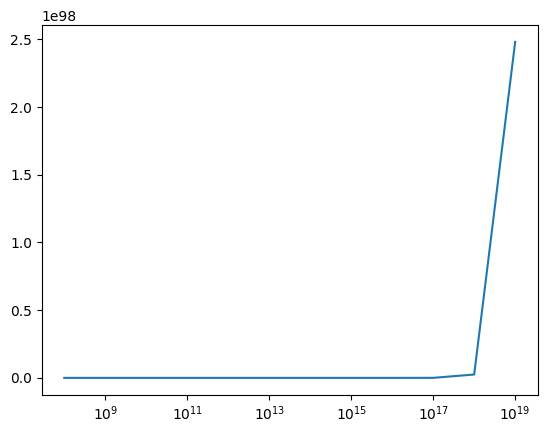

In [112]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def get_lasso_avg_mse(penalty: float):
  mse_avg = 0.0
  # averaging across 5 different 5 and train splits
  for i in range(5):
    test, train = test_train_split(dataset, random_state=i)
    poly_transform(train, degree=9)
    poly_transform(test, degree=9)
    test, train = standardize(test, train)
    X_test = np.array(test[:, :-1])
    Y_test = np.array(test[:, -1])
    W_lasso = lasso_regressor(train, l1_penalty=penalty)
    mse_avg += mean_squared_error(Y_test, np.dot(X_test, W_lasso))
  return mse_avg/5

penalties = np.array([10**i for i in range(8 ,19+1)])
plt.xscale('log')
plt.plot(penalties, np.vectorize(get_lasso_avg_mse)(penalties))
plt.show()

**Inference:** We see that a penalty of 1e17 is best for prediction

### Ridge Penalty vs MSE
We plot the MSE of Ridge Regressor with different l2 penalties to find the ideal one

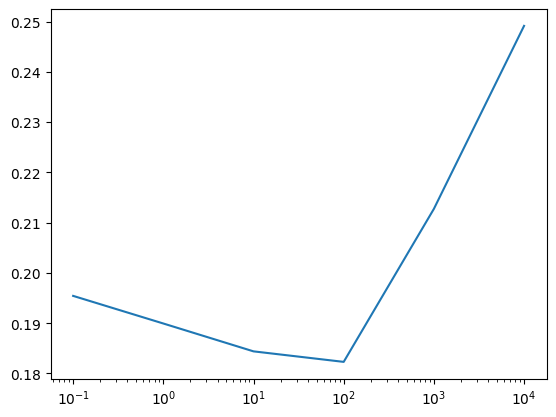

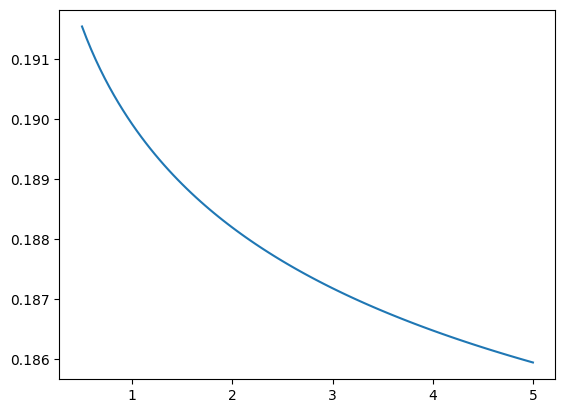

In [113]:
def get_ridge_avg_mse(penalty: float):
  mse_avg = 0.0
  # averaging across 10 different 10 and train splits
  for i in range(5):
    test, train = test_train_split(dataset, random_state=i)
    poly_transform(train, degree=9)
    poly_transform(test, degree=9)
    test, train = standardize(test, train)
    X_test = np.array(test[:, :-1])
    Y_test = np.array(test[:, -1])
    W_ridge = ridge_regressor(train, l2_penalty=penalty)
    mse_avg += mean_squared_error(Y_test, np.dot(X_test, W_ridge))
  return mse_avg/5

penalties = np.array([1e-1, 1, 1e1, 1e2, 1e3, 1e4])
plt.xscale('log')
plt.plot(penalties, np.vectorize(get_ridge_avg_mse)(penalties))
plt.show()
penalties = np.linspace(0.5, 5, 100)
plt.xscale('linear')
plt.plot(penalties, np.vectorize(get_ridge_avg_mse)(penalties))
plt.show()

**Inference:** From the graph we observe that the penalty value of 100 is the best for ridge regression.

### Comparison of R2 score and Mean Squared Error

In [121]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
# initializing metric variables
def round(a: float) -> float:
  return 1.0 if a > 0.5 else 0
for degree in range(1, 9+1):
  r2_avg_lasso = 0.0
  r2_avg_ridge = 0.0
  mse_avg_lasso = 0.0
  mse_avg_ridge = 0.0
  accuracy_test_lasso = 0.0
  accuracy_train_lasso = 0.0
  accuracy_test_ridge = 0.0
  accuracy_train_ridge = 0.0
  for i in range(5):
    dataset = pd.read_csv('preprocessed.csv', index_col = 0)
    test, train = test_train_split(dataset, random_state=i)
    poly_transform(test, degree = degree)
    poly_transform(train, degree = degree)
    test, train = standardize(test, train)
    W_lasso = lasso_regressor(train, l1_penalty=1e17)
    W_ridge = ridge_regressor(train, l2_penalty=100)
    X_test = np.array(test[:, :-1])
    Y_test = np.array(test[:, -1])
    X_train = np.array(train[:, :-1])
    Y_train = np.array(train[:, -1])
    Y_pred_train_lasso = np.dot(X_train, W_lasso)
    Y_pred_train_ridge = np.dot(X_train, W_ridge)
    Y_pred_lasso = np.dot(X_test, W_lasso)
    Y_pred_ridge = np.dot(X_test, W_ridge)
    r2_avg_lasso += r2_score(Y_test, Y_pred_lasso)
    r2_avg_ridge += r2_score(Y_test, Y_pred_ridge)
    mse_avg_lasso += mean_squared_error(Y_test, Y_pred_lasso)
    mse_avg_ridge += mean_squared_error(Y_test, Y_pred_ridge)
    accuracy_test_lasso += np.mean((np.vectorize(round)(Y_pred_lasso))==Y_test)
    accuracy_train_lasso += np.mean((np.vectorize(round)(Y_pred_train_lasso))==Y_train)
    accuracy_test_ridge += np.mean((np.vectorize(round)(Y_pred_lasso))==Y_test)
    accuracy_train_ridge += np.mean((np.vectorize(round)(Y_pred_train_ridge))==Y_train)

  r2_avg_lasso /= 5
  r2_avg_ridge /= 5
  mse_avg_lasso /= 5
  mse_avg_ridge /= 5
  accuracy_test_lasso /= 5
  accuracy_train_lasso /= 5
  accuracy_test_ridge /= 5
  accuracy_train_ridge /= 5
  print("Degree", degree)
  print("Lasso R2_Score: ", r2_avg_lasso)
  print("Ridge R2_Score: ", r2_avg_ridge)
  print("Lasso MSE: ", mse_avg_lasso)
  print("Ridge MSE: ", mse_avg_ridge)
  print("Lasso Accuracy (train):", accuracy_train_lasso)
  print("Ridge Accuracy (train):", accuracy_train_ridge)
  print("Lasso Accuracy (test):", accuracy_test_lasso)
  print("Ridge Accuracy (test):", accuracy_test_ridge)


Degree 1
Lasso R2_Score:  -1.1229906896912343e+34
Ridge R2_Score:  0.10009825287404941
Lasso MSE:  2.1761576602621566e+33
Ridge MSE:  0.1753218594109472
Lasso Accuracy (train): 0.4102425876010781
Ridge Accuracy (train): 0.752021563342318
Lasso Accuracy (test): 0.42926829268292677
Ridge Accuracy (test): 0.42926829268292677
Degree 2
Lasso R2_Score:  -7.957016558467477e+34
Ridge R2_Score:  0.09784804938576766
Lasso MSE:  1.5435051543773578e+34
Ridge MSE:  0.17585393520700882
Lasso Accuracy (train): 0.37358490566037733
Ridge Accuracy (train): 0.7536388140161725
Lasso Accuracy (test): 0.3853658536585366
Ridge Accuracy (test): 0.3853658536585366
Degree 3
Lasso R2_Score:  -3.68035721963441e+35
Ridge R2_Score:  0.09550556374395199
Lasso MSE:  7.14268781274869e+34
Ridge MSE:  0.1763469201744423
Lasso Accuracy (train): 0.3665768194070081
Ridge Accuracy (train): 0.7552560646900269
Lasso Accuracy (test): 0.3853658536585366
Ridge Accuracy (test): 0.3853658536585366
Degree 4
Lasso R2_Score:  -1.9755

**Inference:** Our observations reveal that Lasso regression consistently yields unsatisfactory results across various degrees and penalty settings, rendering it an unsuitable model for our dataset. On the other hand, Ridge regression produces acceptable outcomes for linear degrees but deteriorates as the degree increases. Consequently, both models are suboptimal fits for our data, with Ridge regression showing a slight edge in performance.

# **_5. Comparison of Logistic Regression and Least Squares Classification_**



## Splitting dataset into test and training

In [115]:
import numpy as np
import pandas as pd
import random
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
random.seed(0)
test[0]

array([ 1.        ,  0.68548505, -1.26500026, -1.03002994, -0.01272878,
        0.02376569, -1.18372703, -1.47095306,  1.82871762,  0.        ])

## **_Logistic Regression_**

In [116]:
# Below is the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression
def logistic_regression(train: np.ndarray,learning_rate=1e-3,max_iteration=10000,tolerance=1e-5):
    m , n = train.shape
    X = train[:,:-1]
    Y = train[:,-1]
    W = np.random.randn(n-1)
    for _ in range(max_iteration):
        z = np.dot(X, W)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (Y - predictions))
        W += learning_rate * gradient  
        learning_rate/=1.0005
        if np.linalg.norm(learning_rate * gradient) < tolerance:
            break
    return W

def logistic_predict(X,W):
    r = np.dot(X.T, W)
    predictions = sigmoid(r)
    return np.round(predictions)

W_logistic = logistic_regression(train)
print("Weights:", list(W_logistic))

Weights: [-1.1177473071659239, 0.04275432540419331, 0.8908655521135603, -0.0961421598532788, -0.009108518188908343, -0.0800542530226054, 0.4571501534821578, 0.017765117174533235, 0.1991461811675581]


## **_Least Squares Classification_**

In [117]:
def least_square(train: np.ndarray):
    X = train[:,:-1]
    Y = train[:,-1]
    W = np.linalg.pinv(X) @ Y
    return W

def least_square_predict(X,W):
    np.random.seed(2)
    predictions = np.dot(X.T, W)
    return np.round(predictions)

W_ls = least_square(train)
print("Weights:", list(W_ls))

Weights: [0.2884097035040431, 0.007684978776583366, 0.1482707358465739, -0.012479820939341633, -0.0024078851284733346, -0.005115147785725714, 0.07367877886036717, 0.007454655293209869, 0.0347425288841971]


## **_Insights drawn (plots, markdown explanations)_**

### _Accuracy comparison_

In [118]:
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
W_logistic = logistic_regression(train)
W_least_square = least_square(train)

X_train = train[:,:-1]
Y_train = train[:,-1]
X_test = test[:,:-1]
Y_test = test[:,-1]


y_pred_logistic_train = logistic_predict(X_train.T, W_logistic)
accuracy = np.mean(y_pred_logistic_train == Y_train)
print("Logistic Regression Accuracy for train data:", accuracy)

y_pred_logistic_test = logistic_predict(X_test.T, W_logistic)
accuracy = np.mean(y_pred_logistic_test == Y_test)
print("Logistic Regression Accuracy for test data:", accuracy)

y_pred_msc_train = least_square_predict(X_train.T, W_ls)
accuracy = np.mean(y_pred_msc_train == Y_train)
print("Least square classifier Accuracy for train data:", accuracy)

y_pred_mcs_test = least_square_predict(X_test.T, W_ls)
accuracy = np.mean(y_pred_mcs_test == Y_test)
print("Least square classifier Accuracy for test data:", accuracy)

Logistic Regression Accuracy for train data: 0.7439353099730458
Logistic Regression Accuracy for test data: 0.7967479674796748
Least square classifier Accuracy for train data: 0.7493261455525606
Least square classifier Accuracy for test data: 0.8048780487804879


**Inference:** In the comparison above, we assessed the accuracy of logistic regression and least square classification. The results indicate that least square classification achieved higher accuracy than logistic regression.


### _Confusion matrix Comparison_


C:\Users\sbgup\AppData\Local\Temp\ipykernel_12884\1992320988.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


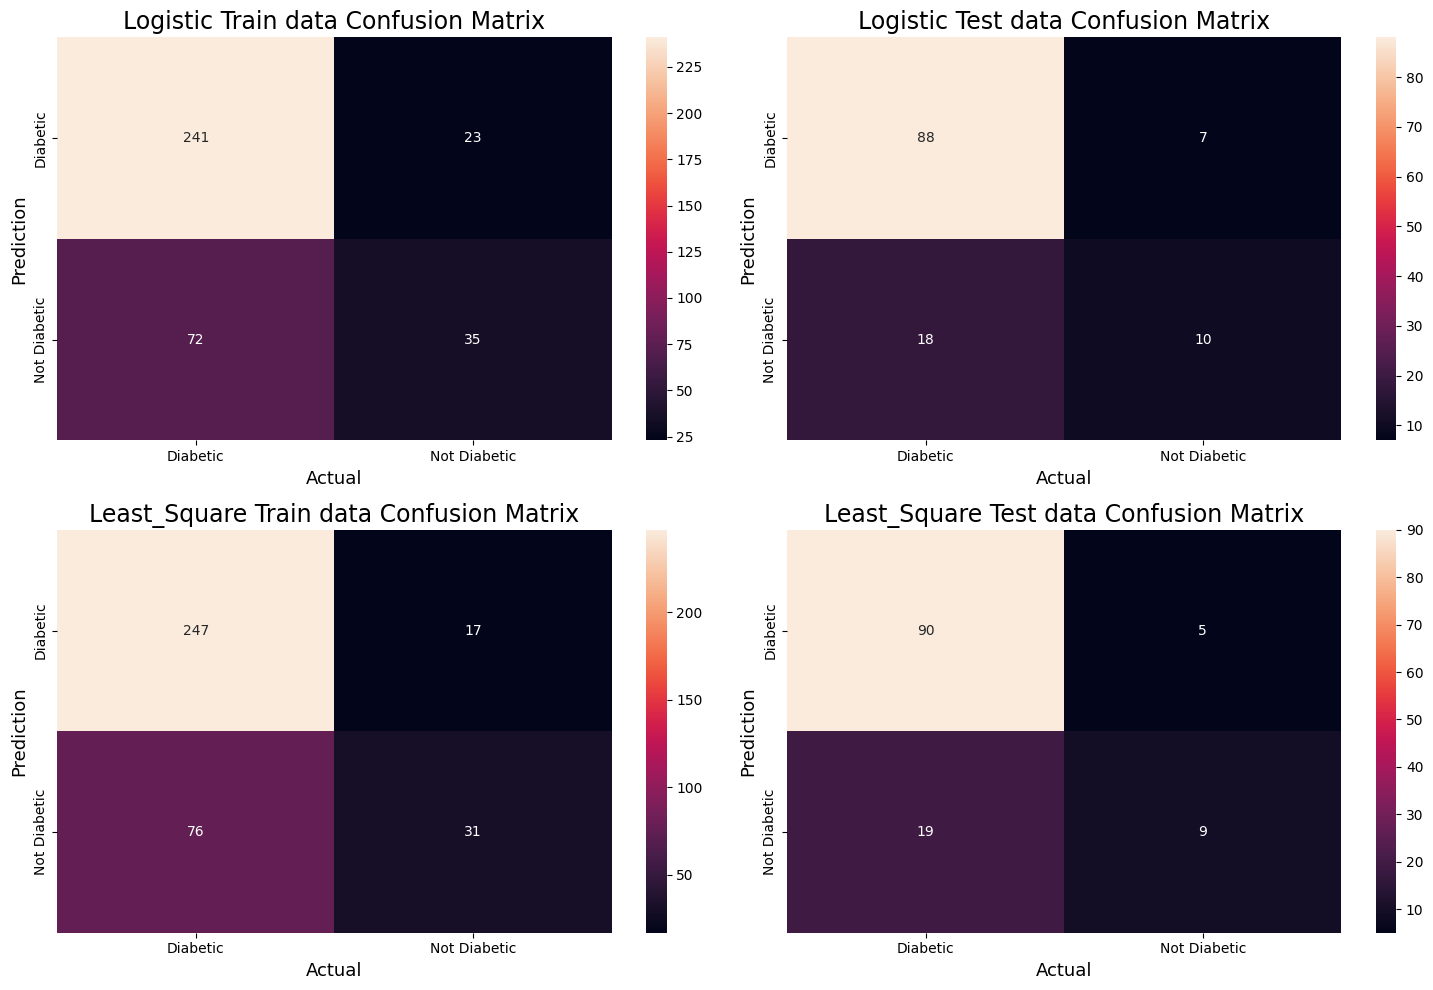

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
cm = confusion_matrix(Y_train,y_pred_logistic_train)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic','Not Diabetic'],
            yticklabels=['Diabetic','Not Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Logistic Train data Confusion Matrix',fontsize=17)

plt.subplot(2, 2, 2)
cm = confusion_matrix(Y_test,y_pred_logistic_test)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic','Not Diabetic'],
            yticklabels=['Diabetic','Not Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Logistic Test data Confusion Matrix',fontsize=17)

plt.subplot(2,2,3)
cm = confusion_matrix(Y_train,y_pred_msc_train)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic','Not Diabetic'],
            yticklabels=['Diabetic','Not Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Least_Square Train data Confusion Matrix',fontsize=17)

plt.subplot(2,2,4)
cm = confusion_matrix(Y_test,y_pred_mcs_test)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic','Not Diabetic'],
            yticklabels=['Diabetic','Not Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Least_Square Test data Confusion Matrix',fontsize=17)

plt.tight_layout()
plt.show()




**Inference:** The confusion matrix further demonstrates that the least square classifier model outperforms the other model, providing superior results.

# Final Inference
The evidence overwhelmingly supports the fact that the Least Square classifier model is the best among all the models we used.

# **_6. References_**
## _Some Important Python Libraries:_
1. Numpy Documentation: https://numpy.org/doc/1.26/user/
2. Pandas Documentation: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
3. MatPlotLib Documentation: https://matplotlib.org/stable/index.html
4. Random Documentation: https://docs.python.org/3/library/random.html
5. SDV Documentation: https://docs.sdv.dev/sdv/
6. Seaborn Documentation: https://seaborn.pydata.org/tutorial.html
7. scikit: https://scikit-learn.org/stable/user_guide.html

## _Data preprocessing and data exploration:_
1. Overview of Preprocessing : https://towardsdatascience.com/data-preprocessing-and-eda-for-data-science-50ba6ea65c0a
2. Replacing NULL or incorrect values: https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1
3. Removing the Outliers: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

## _Stochastic Gradient Descent:_ 
1. Understanding the Algorithm: https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/ 
2. Understanding the Algorithm: https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31
3. Implementation of Algorithm: https://medium.com/@rebirth4vali/stochastic-gradient-descent-sgd-from-scratch-in-python-661480ddf5fa
4. Implementation of Algorithm: https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c

## _Batch Gradient Descent:_
1. Understanding the Algorithm: https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a
2. Variations of Gradient descent: https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461
3. Implementation of Algorithm: https://medium.com/@ugurozcan108/batch-gradient-descent-in-python-4d3b16d40755

## _Lasso Regression:_
1. Understanding the Algorithm: https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/
2. Understanding the Algorithm: https://medium.com/mlearning-ai/lasso-regression-in-python-923f4914e3ca#:~:
3. Implementation of Algorithm: https://www.kaggle.com/code/vignesh1609/ridge-lasso-linear-regression-models

## _Ridge Regression:_
1. Understanding the Algorithm: https://keremkargin.medium.com/ridge-regression-fundamentals-and-modeling-in-python-bb56f4301f62
2. Understanding the Algorithm: https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/
3. Implementation of Algorithm: https://www.kaggle.com/code/vignesh1609/ridge-lasso-linear-regression-models

## _Logistic Regression:_
1. Understanding the Algorithm: https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/
2. Understanding the Algorithm: https://youtu.be/zM4VZR0px8E?si=H6MMtZWCvs9zHdOo
3. Implementation of the Algorithm: https://youtu.be/YYEJ_GUguHw?si=2Cn68WBEkXB7ctey


## _Least Square Classification:_
1. Understanding the Algorithm: https://notesonai.com/Least+squares+for+classification
2. Understanding the Algorithm: https://youtu.be/WAxfTAy6RS8?si=pVgZSFr4TqlO_sJG
2. Implementing the Algorithm: https://towardsdatascience.com/derivation-of-least-squares-regressor-and-classifier-708be1358fe9\ 

